# Week 1 tutorial: Linear regression

### Introduction
In this exercise, you will implement linear regression and get to see it work on data. Hopefully you have watched the video lectures associated with this week. **Please keep the function declarations as they are.**

To get started with this exercise, you will need to download the Week 1 folder from the github or dropbox.

### External files included for this exercise
 - $\texttt{ex1data1.txt}$ - Dataset for linear regression with one variable
 - $\texttt{ex1data2.txt}$ - Dataset for linear regression with multiple variables


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1- Simple numpy function

Let's kick things off by making a happy little identity matrix. 

**Exercise:** Make a function that takes nothing in, and returns a 5x5 identity matrix.

*Hint: check the documentation for `np.eye()` and `np.identity()`.*


In [2]:
def warmUp():
    ### START CODE HERE ###
    A = np.identity(5)
    ### END CODE HERE ###
    return A
print('Diagonal matrix of ones:\n', warmUp())

Diagonal matrix of ones:
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


**Expected Output:**

`Diagonal matrix of ones:
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]`


## 2 - Linear regression with one variable
In this section you will implement linear regression with a single varaible to predict profits. We have ascertained data from food trucks in various cities that breaks down the profits and populations of those cities. A particularly daft business executive from *Mangia con Maffetone LLC* has approached you with this data and asked for advice on which city to expand to next.

The file $\texttt{ex1data1.txt}$ contains the dataset for our linear regression prob- lem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss. The file is loaded using the commands in the cell below. 

In [3]:
data = np.loadtxt('./data/ex1data1.txt',delimiter=',') #Loads simple comma separated values
X = data[:,0] # Sets all (:) of the first (0) column equal to a new variable X
m = X.shape[0]
y = data[:,1].reshape((m,1)) # Sets the second column to y
# This makes y have the shape (97,1) instead of (97,). This is an important implementation distinction. 
print("Number of training examples =",m)

Number of training examples = 97


### 2.1 Plotting the data
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). (Many other problems that you will encounter in data science are multi-dimensional and can’t be plotted on a 2D plot.)

**Exercise:** Using the X, y variables from above create a plot of the 2D data. Label the y-axis as "Profit in 10,000s" and the x-axis "Population of City in 10,000s". Use red x's for the markers.<br>
*Hint: matplotlib.pyplot has been imported as plt*

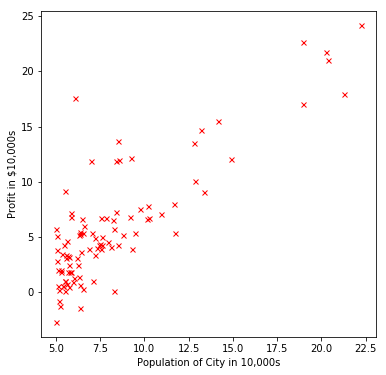

In [4]:
### START CODE HERE ###
fig=plt.figure(figsize=(6,6))
plt.plot(X,y,'rx',MarkerSize=5)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()
### END CODE HERE ###

**Expected Output:**
<img src="data/plot.png" style="width: 400px">

### 2.2 - Gradient Descent
In this part, you will fit the linear regression parameters θ to our dataset using gradient descent.

#### 2.2.1 - Update Equations
The objective of linear regression is to minimize the cost (loss) function
\begin{equation*}
J(\theta) = \frac{1}{2m}\sum^{m}_{i=1} (h_\theta(x^{(i)})-y^{(i)})^2
\end{equation*}
where the hypothesis $h_\theta(x)$ is given by the linear model
\begin{equation*}
h_\theta(x) = \theta^Tx = \theta_0 + \theta_1x_1.
\end{equation*}

Recall that the parameters of your model are the $\theta_j$ values. These are the values you will adjust to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update
\begin{equation*}
\theta_j := \theta_j - \alpha\frac{1}{m}\sum^{m}_{i=1} (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
\end{equation*}
simultaneously for all $j$. 
With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.

#### 2.2.2 - Implementation
- Below the data is already set up for linear regression. We add another dimesion (of ones) to our data to accomodate the $\theta_0$ intercept term. 
- We also initialize the parameters to 0 and the learning rate `alpha` to 0.01.
- Finally, because of array broadcasting rules, life will be easier to debug if we enforce linear algebra. Thus when you make vectors (nx1 arrays), force them into a (n,1) shape instead of the numpy default of (n,). 

In [5]:
X = np.zeros((m,2)) #Start with a matrix of zeros with 2 columns of m training examples in each row
X[:,0] = np.ones(m) # Set the first column to all 1, to multiply against constant parameter
X[:,1] = data[:,0] # X data for the first order linear parameter
theta = np.zeros((2,1)) # Initialize fitting parameters (weights)

iterations = 1500
alpha = 0.01 # learning rate

#### 2.2.3 - Computing the cost $J(\theta)$
As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate  $J(\theta)$ so you can check the convergence of your gradient descent implementation.

**Exercise:** Complete the function `compute_cost()`, which is a function that computes --- you guessed it --- $J(\theta)$. <br>
*Hint: As you are doing this, remember that $X$ and $y$ are not scalar values, but matricies whose rows represent the examples from the training set. Consider using `np.matmul()` or `np.dot()`.*

In [6]:
def compute_cost(X,y,theta):
    '''
    Computes the cost for linear regression
    J = compute_cost(X,y,theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    '''
    
    m = y.shape[0] #Number of training examples
    J = 0;
    ### START CODE HERE ###
    J = np.sum((np.dot(X,theta) - y)**2)/(2*m)
    ### END CODE HERE ###
    return J
print(compute_cost(X,y,theta))

32.072733877455676


**Expected Output:**<br>
32.07

#### 2.2.4 - Gradient Descent
Next you will implement the gradient descent algorithm. The loop structure has been written for you, and you only need to supply the updates to $\theta$ within each iteration. 

As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, and not $X$ and $y$. That is, we minimize the value of $J(\theta$) by changing the values of the vector $\theta$, and not by changing $X$ or $y$. 

**Exercise:** Complete the loop in the function `gradient_descent()` to provide the update for $\theta$. Please refer to the equations from the video lectures, or above.<br>
*Hint: Make sure to vectorize your code using matrix multiplications. If you are unsure of operations, it may help to consider the shape of given arrays and the necessary resultand shapes.*

In [7]:
def gradient_descent(X,y,theta,alpha,num_iters):
    '''
    Performs gradient descent to learn theta
    
    Inputs
    ===============
    X: input features
    y: desired ouput values
    alpha: learning rrate
    num_iters: number of iteratons for learning
    
    Returns
    ===============
    theta: final learned weights
    J_history: list of loss over each itteration
    '''
    m = y.shape[0] #Number of training examples
    J_history = np.zeros((num_iters,1))
    
    for i in range(num_iters):
        ### START CODE HERE ###
        theta = theta - alpha/m * np.dot((np.dot(X,theta)-y).T, X).T
        ### END CODE HERE ###
        J_history[i] = compute_cost(X,y,theta)
    return theta, J_history
    

Below we run the gradient descent function and plot the resultant linear regression fit, as well as the returned loss history. This history allows us to ensure that the loss function is indeed decreasing over time. 

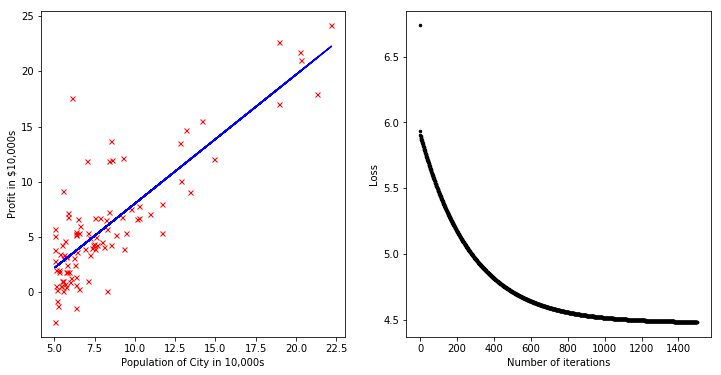

Learned value of theta0: -3.630 
Learned value of theta1:  1.166
[0.45197679]
For population = 35,000, we predict a profit of $ 4519.77


In [8]:
# Example run
learned_theta, J_hist = gradient_descent(X,y,theta,alpha,iterations)
# Example plotting
fig=plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(X[:,1],y,'rx',MarkerSize=5)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
ax1.plot(X[:,1],np.dot(X,learned_theta),'b-')
ax2 = fig.add_subplot(1,2,2)
ax2.plot([a for a in range(iterations)], J_hist,'k.',MarkerSize=5)
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()
print('Learned value of theta0:{:7.3f}'.format(learned_theta[0,0]),
      '\nLearned value of theta1:{:7.3f}'.format(learned_theta[1,0]))
# Make a prediction
predict1 = np.dot(np.array([1,3.5]),learned_theta)
print(predict1)
print('For population = 35,000, we predict a profit of ${:8.2f}'.format(predict1[0]*10000))

**Expected Output:**
<img src="data/plot2.png" style="width: 600px"><br>
Learned value of theta0: -3.630 <br>
Learned value of theta1:  1.166<br>
For population = 35,000, we predict a profit of $ 4519.77


### 2.4 - Visualizing $J(\theta)$

To get an understanding of the the cost function, let's plot the cost over a 2-d grid of $\theta_0$ and $\theta_1$ values. You will not need to code anything new for this part, but you should understand how the code you have written already is creating these images. 

The important thing to observe is that the loss function is a convex function that has a clear global minimum that we can find with ease. 

In [9]:
# Initialize grid
theta0_vals = np.linspace(-10, 10,100);
theta1_vals = np.linspace(-1, 4,100);
t0,t1 = np.meshgrid(theta0_vals,theta1_vals)
J_vals = np.zeros((t0.shape))

#Fill out values
for i in range(t0.shape[0]):
    for j in range(t0.shape[1]):
        t = np.array([t0[i,j],t1[i,j]]).reshape(2,1)
        J_vals[i,j] = compute_cost(X,y,t)

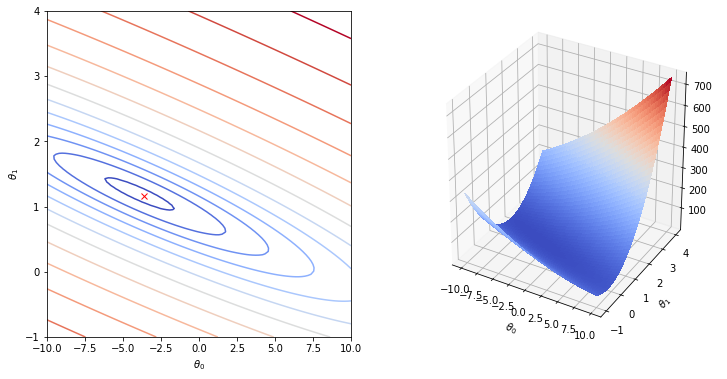

In [10]:
from mpl_toolkits.mplot3d import axes3d, Axes3D 
from matplotlib import cm
fig=plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax1.contour(theta0_vals,theta1_vals,np.log(J_vals),15,
           cmap=cm.coolwarm)
ax1.plot(learned_theta[0,0],learned_theta[1,0],'rx')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
ax2 = fig.add_subplot(1,2,2,projection='3d')

ax2.plot_surface(t0,t1,J_vals,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.show()

## 3 - Linear regression with multiple variables
So you smahsed the linear regression. Dope. Now lets get jazzy with it. 

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.<br>
The file `ex1data2.txt` contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.
|
### 3.1 - Feature normalization
After we load the data, by looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly. <br>


In [11]:
data2 = np.loadtxt('./data/ex1data2.txt',delimiter=',')
m=data2.shape[0]
X = data2[:,0:-1]
y = data2[:,-1].reshape((m,1))


**Exercise:** complete the function `feature_normalization()` to 
- subtract the mean of each feature from the dataset
- after subtracting the mean, divide by the standard deviation ("feature scaling")
- be able to do this for datasets of all sizes (arbitrary numbers of features/ training examples)


*Hint: numpy has some builtin functions for `mean` and `std`, that allow you to take the measure down a specific axis of the matrix. In our datasets each column will correspond to a feature, and each row will correspond to an example*

When normalizing the features, it is important to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters from the model, we often want to predict the prices of houses we have not seen before. Given a new x value (living room area and number of bedrooms), we must first normalize x using the mean and standard deviation that we had previously computed from the training set.

In [12]:
def feature_normalization(data):
    '''
    Normalizes a set of features within a dataset. 
    Shifts each feature mean to zero and scales by the standard deviation. 
    The dataset should be 2-dimensional with each column corresponding to a feature, 
    and each row corresponding to an example.
    
    Inputs
    ===============
    data: complete (m,n) dataset
    
    Returns
    ===============
    data: feature-wise normalized (m,n) dataset
    mu: feature-wise mean
    sigma: feature wise standard deviation ()
    '''

    ### START CODE HERE ###
    mu = np.mean(data, axis=0)
    sigma = np.std(data,axis=0)
    data = (data - mu)/ sigma
    ### END CODE HERE ###
    
    return data,mu,sigma

In [13]:
print("First 3 examples for training:\n",data2[0:3,:])
X, mu, sigma = feature_normalization(X)
print("First 3 example features after normalization:\n",X[0:3,:])

# Add intercept term
X = np.concatenate((np.ones((m,1)),X),axis=1)

First 3 examples for training:
 [[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]]
First 3 example features after normalization:
 [[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]]


**Expected Output:**

`First 3 examples for training:
 [[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]]
First 3 example features after normalization:
 [[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]]
`

### 3.2 Gradient Descent 
Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix X. The hypothesis function and the batch gradient descent update rule remain unchanged.

Complete the functions `compute_cost_multi()` and `gradient_descent_multi()` to implement the cost function and gradient descent for linear regression with multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too. *Make sure your code supports any number of features and is well-vectorized.*

The multivariate cost function can be written in the following vectorized form:
\begin{equation*}
J(\theta) = \frac{1}{2m}(X\theta - \bar y)^T (X\theta-\bar y)
\end{equation*}

In [14]:
def compute_cost_multi(X,y,theta): 
    '''
    Computes the cost for linear regression
    J = compute_cost(X,y,theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    '''
    J=0
    m=y.shape[0]
    ### START CODE HERE ###
    J = np.dot((np.dot(X,theta) - y).T,(np.dot(X,theta) - y))
    ### END CODE HERE ###
    return J

In [15]:
def gradient_descent_multi(X,y,theta,alpha,num_iters):
    '''
    Performs gradient descent to learn theta
    
    Inputs
    ===============
    X: input features
    y: desired ouput values
    alpha: learning rrate
    num_iters: number of iteratons for learning
    
    Returns
    ===============
    theta: final learned weights
    J_history: list of loss over each itteration
    '''
    m = y.shape[0] #Number of training examples
    J_history = np.zeros((num_iters,1))
    for i in range(num_iters):
        ### START CODE HERE ###
        theta = theta - alpha/m * np.dot((np.dot(X,theta)-y).T, X).T
        ### END CODE HERE ###
        J_history[i] = compute_cost(X,y,theta)
    return theta, J_history

The following estimates the price of a three-bedroom house with 1650 square feet. 

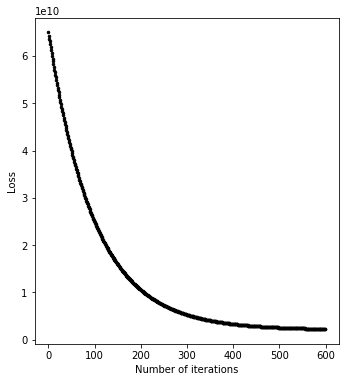

Predicted price = $   331014.11


In [16]:
alpha = 0.005;
num_iters = 600;
theta_multi = np.zeros((3,1))
learned_theta, J_history = gradient_descent_multi(X,y,theta_multi,alpha,num_iters)
x = np.ones((1,3))
x[0,1:] = np.array([1985,4])
x[0,1:] = x[0,1:] - mu
x[0,1:] = x[0,1:]/ sigma

price = np.dot(x,learned_theta)
# Example plotting
fig=plt.figure(figsize=(12,6))
ax2 = fig.add_subplot(1,2,2)
ax2.plot([a for a in range(num_iters)], J_history,'k.',MarkerSize=5)
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

print("Predicted price = ${:12.2f}".format(price[0,0]))

## 4 - Surely there is an easier way....

While perhaps the above was a bit daunting at times, it is important to understand the maths behind these aproaches before you use them blind. We also learned how to format our `X` data as a matrix and `y` vector as a matrix. We learned the language of the **hypothesis** function that relates each set of **training features** to an estimate of `y`. 

Nonetheless, there plenty of packages for implementing machine learning algorithms with just a few lines of code --- if it wasn't so easy, it wouldn't be so popular. 

The package we will use at this point is called scikit-learn: https://scikit-learn.org/stable/index.html
This package implements most shallow machine learning models you will see thrown around in the physical sciences. As you've witnessed in your trial above, always remember:
# It's just applied statistics.


Now lets reimport out data, and use the scikitlearn version of linear regression on our house data. 
Calling `linear_model.LinearRegression()` will return a class, that can be used to fit to our X,y data.

The methods and attributes of this model class are listed here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [17]:
from sklearn import linear_model
data3 = np.loadtxt('./data/ex1data2.txt',delimiter=',')
m=data3.shape[0]
X = data3[:,0:-1]
y = data3[:,-1].reshape((m,1))
X, mu, sigma = feature_normalization(X)

In [18]:
regr = linear_model.LinearRegression()

**Exercise:** Call `regr.fit(X,y)` in the cell below. Note that in this case, our X matrix doesn't need a column of ones for the y-intercept term. Scikitlearn takes care of all of this. 

In [19]:
### START CODE HERE ###
regr.fit(X,y)
### END CODE HERE ###

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Exercise:** Compare the function `predict_price` below to how we made the prediction above. Here we use the `regr.predict()` on a single row of x values; however, we could have predicted on an entirely different set of values. 

In [20]:
def predict_price(area,n_rooms):
    x = np.zeros((1,2))
    x[0,:] = np.array([area,n_rooms])
    x[0,:] = x[0,:] - mu
    x[0,:] = x[0,:]/ sigma
    price = regr.predict(x)
    
    return price
print("Predicted price = ${:12.2f}".format(predict_price(1985,4)[0,0]))

Predicted price = $   330979.02


# Tests
The cell below will test the functions you produced above, marking failed/ok tests. 

In [21]:
import unittest

class TestWeek1(unittest.TestCase):
    def setUp(self):
        self.id = np.eye(5)
        self.theta = np.zeros((2,1))
        self.data = np.loadtxt('./data/ex1data1.txt',delimiter=',')
        m=self.data.shape[0]
        self.X = np.ones((m,2))
        self.X[:,1] = self.data[:,0] 
        self.y = self.data[:,1].reshape((m,1))
    def test_identity(self):
        self.assertTrue((warmUp().shape[0] == warmUp().shape[1]) and np.allclose(warmUp(), self.id))

    def test_compute_cost(self):
        self.assertTrue(np.abs((compute_cost(self.X,self.y,self.theta))-32.072)<0.001)
        
    def test_gradient_descent(self):
        lt ,_= gradient_descent(self.X,self.y,self.theta,0.02,2000)
        self.assertTrue(np.abs(lt[0,0]--3.8928)<0.0001 and np.abs(lt[1,0]-1.1927)<0.0001)
    
    def test_gradient_descent_multi(self):
        data2 = np.loadtxt('./data/ex1data2.txt',delimiter=',')
        m=data2.shape[0]
        X = data2[:,0:-1]
        y = data2[:,-1].reshape((m,1))
        X, mu, sigma = feature_normalization(X)
        X = np.concatenate((np.ones((m,1)),X),axis=1)
        theta = np.zeros((3,1))
        lt,_ = gradient_descent_multi(X,y,theta,0.005,600)
        x = np.ones((1,3))
        x[0,1:] = np.array([1985,4])
        x[0,1:] = x[0,1:] - mu
        x[0,1:] = x[0,1:]/ sigma
        price = np.dot(x,learned_theta)
        self.assertTrue(np.abs(price-331014.11)<0.01)
unittest.main(argv=[''], verbosity=2, exit=False)

test_compute_cost (__main__.TestWeek1) ... ok
test_gradient_descent (__main__.TestWeek1) ... ok
test_gradient_descent_multi (__main__.TestWeek1) ... ok
test_identity (__main__.TestWeek1) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.051s

OK
